project title: customer Data Statistical Analysis
customer segmwentation data from kaggle.com
Description: Statistical  analysis of customer data with visualizations
fisrtly we had to import our data and cleaned it by checking for missig values, duplicates and outliers
afterwards we had to compare some fields and came out with visualizations of histogram, boxplot and scattered plot
setup instructions:seaborn, scipy,pandas, numpy
key findings: younger customers spend more, p-value<0.5

In [17]:
import pandas as pd
import numpy as np
y=pd.read_csv(r"C:\Users\Dave\Documents\Mall_Customers.csv")
print(y.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [18]:
print(y.info())
print(y.isnull().sum())
print(y.drop_duplicates())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23    

In [31]:
y['Gender'] = y['Gender'].str.strip().str.title()
print(y['Gender'])

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


In [20]:
# detecting outliers 
import numpy as pd
Q1=y['Age'].quantile(0.25)
Q3=y['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=y[(y['Age']<lower_bound)|(y['Age']>upper_bound)]
print(outliers[['Age']])

Empty DataFrame
Columns: [Age]
Index: []


In [21]:
y["Age"].fillna(y["Age"].mean(), inplace=True)
y


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
print(y.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [23]:
# how to perform a t test
from scipy import stats
group1=y[y['Age']<30]['Spending Score (1-100)']
group2=y[y['Age'] >=30]['Spending Score (1-100)']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}")
print(f"p-value: {p_value}")

T-Statistic: 2.8783409317793653
p-value: 0.004436782248053247


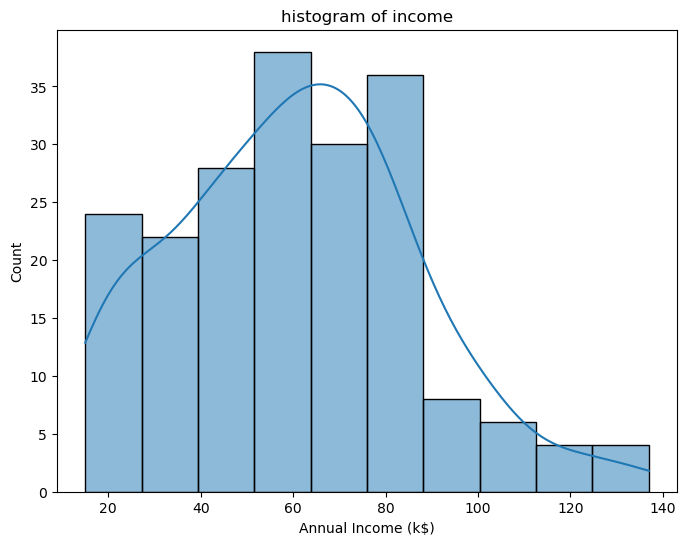

In [24]:
#histogram for Annual income
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.histplot(y['Annual Income (k$)'],kde=True)
plt.title("histogram of income")
plt.show()

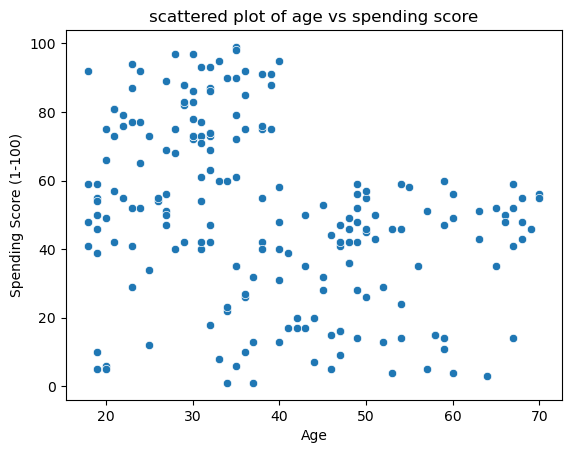

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8,6))
sns.scatterplot(x ='Age', y='Spending Score (1-100)', data=y)
plt.title("scattered plot of age vs spending score")
plt.show()

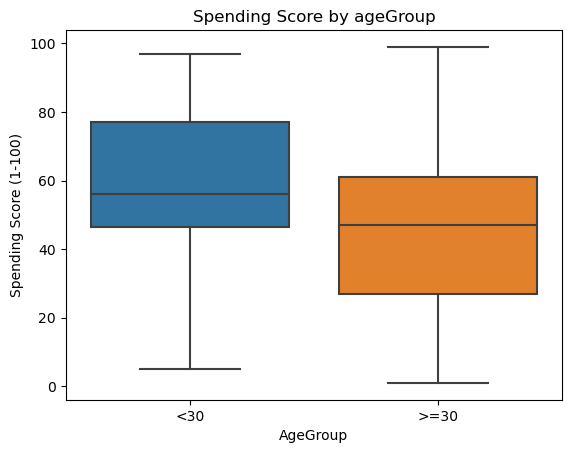

In [27]:
# boxplot of spending score by age 
import seaborn as sns
import matplotlib.pyplot as plt
y['AgeGroup']=np.where(y['Age']<30, '<30', '>=30')
sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=y)
plt.title("Spending Score by ageGroup")
plt.show()